In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

from os import walk
from skimage.metrics import structural_similarity as ssim

from paths import TEMPLATE_IMAGES_DIR  # YOU NEED TO GO TO THE paths.py FILE AND PUT YOUR FOLDER OF IMAGES

---

**The first task is to load all images. Both the correlation masks and the license plates images.**

---

In [3]:
def load_licensePlates():
    pass

In [4]:
def load_templates():

    ALL_TEMPLATES_PATH = [TEMPLATE_IMAGES_DIR / image_name for image_name in os.listdir(TEMPLATE_IMAGES_DIR)]
    
    templates = {}

    for (dirpath, dirnames, filenames) in walk(TEMPLATE_IMAGES_DIR):
        for idx, filename in enumerate(filenames):
            templates[filename[0]] = (ALL_TEMPLATES_PATH[idx])

    for char in templates.keys():
        image = cv.imread(str(templates[char]), cv.IMREAD_GRAYSCALE)
        image = cv.resize(image, (0, 0), fx = 0.27, fy = 0.27)
        image = cv.threshold(image, 120, 255, 0)[1]
        templates[char] = image
    
    return templates

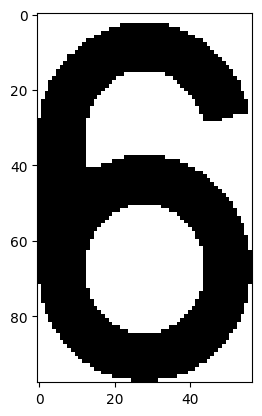

In [5]:
templates = load_templates()
plt.imshow(templates['6'], 'gray')

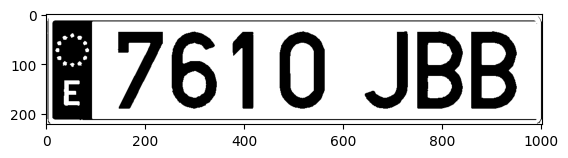

In [6]:
# Load image
original_plate = cv.imread('matricula.png')
plate = cv.cvtColor(original_plate, cv.COLOR_RGB2GRAY)
plate = cv.threshold(plate, 120, 255, 0)[1]
plt.imshow(plate, 'gray')

In [7]:
canny = cv.Canny(plate, 100, 150, True)

# Find contours
cnts = cv.findContours(canny, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Iterate thorugh contours and draw rectangles around contours
for c in cnts:
    x,y,w,h = cv.boundingRect(c)
    cv.rectangle(original_plate, (x, y), (x + w, y + h), (36,255,12), 2)


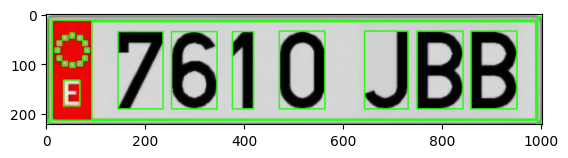

In [8]:
plt.imshow(original_plate, 'gray')

In [9]:
blobs = []
coord = []

for c in cnts:
    x,y,w,h = cv.boundingRect(c)
    
    if (w >= 15 and w <= 200) and h >= 30 and x > 100:
        blobs.append(cv.threshold(plate[y:y+h, x:x+w], 120, 255, 0)[1])
        coord.append(x)

paired_list = list(zip(blobs, coord))

sorted_pairs = sorted(paired_list, key=lambda x: x[1])

blobs = [pair[0] for pair in sorted_pairs]

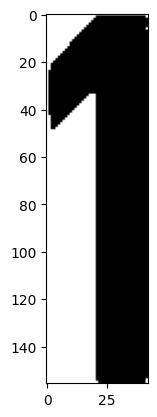

In [34]:
plt.imshow(blobs[2], 'gray')

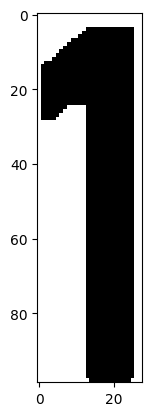

In [32]:
plt.imshow(templates['1'], 'gray')

In [35]:
# value = cv.matchTemplate(blobs[25],templates['1'], cv.TM_CCORR_NORMED)
# plt.imshow(value, 'gray')

plate_chars = []

for blob in blobs:
    for char, template in templates.items():
        tmp = cv.resize(template, blob.shape[::-1])
        result = cv.matchTemplate(blob, tmp, cv.TM_CCOEFF_NORMED)
        threshold = 0.7

        if np.any(result >= threshold):
            plate_chars.append(char)
            break

print(plate_chars)


['7', '6', '1', '0', 'J', 'B', 'B']


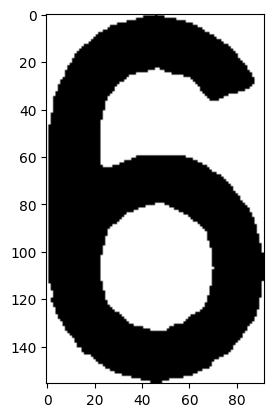

In [13]:
plt.imshow(blobs[1], 'gray')

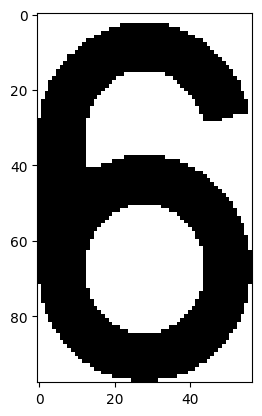

In [14]:
plt.imshow(templates['6'], 'gray')

In [15]:
result = cv.matchTemplate(blobs[1], templates['6'], cv.TM_CCOEFF_NORMED)
threshold = 0.6
if np.any(result >= threshold):
    print('Images match')